dataframe sort functions 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
s=np.random.randn(6,2)
df=pd.DataFrame(s,columns=("d1","d2"),index=list("abcdef"))
print(df)
df.to_csv("df.csv")
print(df.head(2))
print(df.tail(2))
print(df.empty)

print(df.sort_index())
print(df.sort_values(by="d1",ascending=True))

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
s=np.random.randn(2,2)
df=pd.DataFrame(s,columns=("d1","d2"),index=list("ab"))
print(df)
print(df.sum())
print(df.mean())
print(df.describe())

map on column, applymap on dataframe, apply on a column

include line %matplotlib inline , otherwise it does not show the plot

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
def adder(ele1,ele2):
    return ele1+ele2

s=np.random.randn(2,2)
df=pd.DataFrame(s,columns=("d1","d2"),index=list("ab"))
print(df)
print(df.apply(lambda x:x.max()-x.min()))
print("apply np.mean")
print(df.apply(np.max))
print("use pipe of dataframe")
print(df.pipe(adder,2))
print(df["d1"].map(lambda x:x*10))
print(df.applymap(lambda x:x*10))

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
s=np.random.randn(6,2)
df=pd.DataFrame(s,columns=("d1","d2"))
print(df)

df.plot.box()
df.plot.bar(stacked=True)
df.plot.hist(bins=20)




In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
df=pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df.diff(periods=1).hist(bins=20)


plot area and scatter

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(5, 2), columns=list("ab"))
print(df)
df.plot.area()
df.plot.scatter(x="a",y="b")

plot pie

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(4,1), index=['a', 'b', 'c', 'd'], columns=['x'])
print(df)
df.plot.pie(subplots=True)

dataframe groupby functions

In [ ]:
import pandas as pd
import copy

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df)
print("select rows greater than Year 2014")
print(df[df["Year"]>2014])

print("make a deep copy, and delete the column Rank")
df1=copy.deepcopy(df)
del df1["Rank"]
print(df1)

print("groupby Team, and print a specific Team by iteration")
#grouped=df.groupby(["Team","Year"])
grouped=df.groupby("Team")
for name,group in grouped:
    if name=="Kings":
        print(name)
        print(group)
        
print("groupby Team, and print a specific Team by get_group")
print(grouped.get_group("Riders"))

print("use aggregation")
grouped=df.groupby("Year")
print(grouped["Points"].agg([np.average,np.mean,np.max,np.min,np.sum,np.std]))

print("use filter")
grouped=df.groupby("Team")
print(grouped.filter(lambda x:len(x)>3))

print("use transform")
grouped=df.groupby("Team")
score=lambda x:(x-x.mean())/(x.std()*10)
print("Transform on a group")
print(grouped.transform(score))
print("transform on a column")
print(df["Points"].transform(score))

print(df.set_index("Year"))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s=np.random.randn(6,4)
df1=pd.DataFrame(s,columns=list("abcd"),index=list("123456"))
#print(df1)
df1.to_csv("df1.csv")

s=np.random.randn(6,4)
df2=pd.DataFrame(s,columns=list("efgh"),index=list("123456"))
#print(df2)
df2.to_csv("df2.csv")

inputfiles=["df1.csv","df2.csv"]
tmp=[]

for f in inputfiles:
    #tmp.append(pd.read_csv(f))
    tmp.append(pd.read_csv(f))

df=pd.concat(tmp)
df.describe()
df.columns
#del df["h"]
#df=df[df["a"]>0]
#df[df.b>0]
#df=df[["c","d","e","f"]]
df.plot(kind="barh",stacked=True)
df.plot(kind="scatter",x="a",y="d")
df.plot(kind="hist",bins=20)
ax=df.plot(kind="kde",title="This is KDE")
#pd.scatter_matrix(df,diagonal='kde',color="k",alpha=0.3)
ax.get_figure().savefig("testkde.png")

          jobs  core power  avg_cpuperevent   total_power
taskid                                                   
12040326  1937   11.211264       410.905287  8.923309e+06
12059935  4006   12.567877       372.899426  1.877434e+07


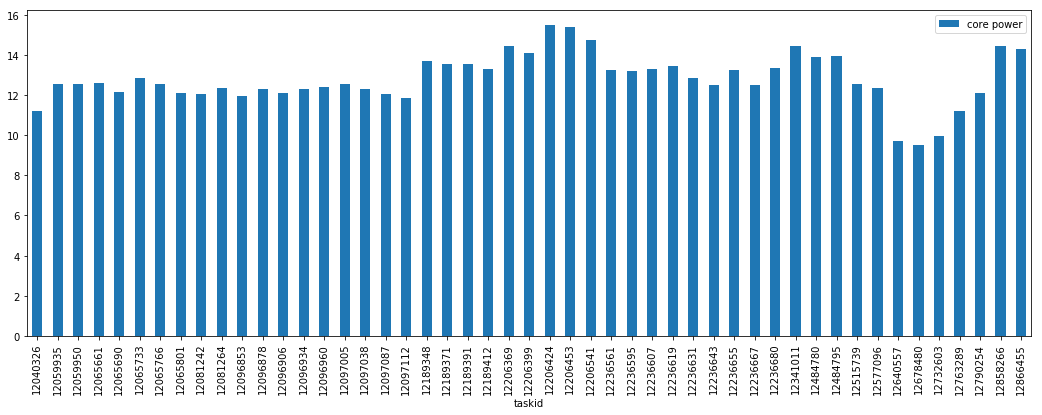

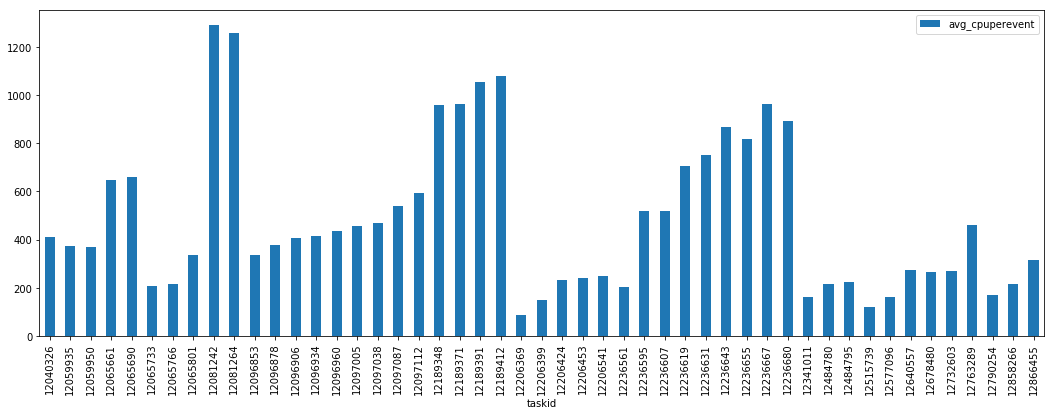

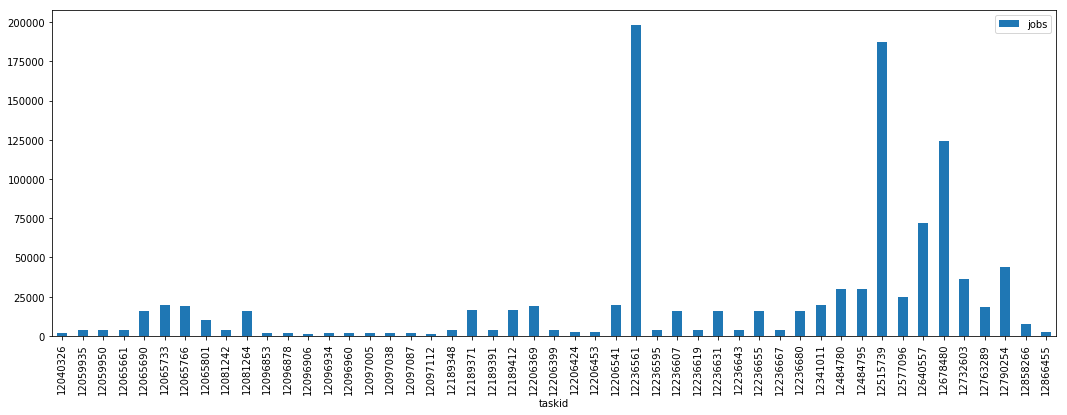

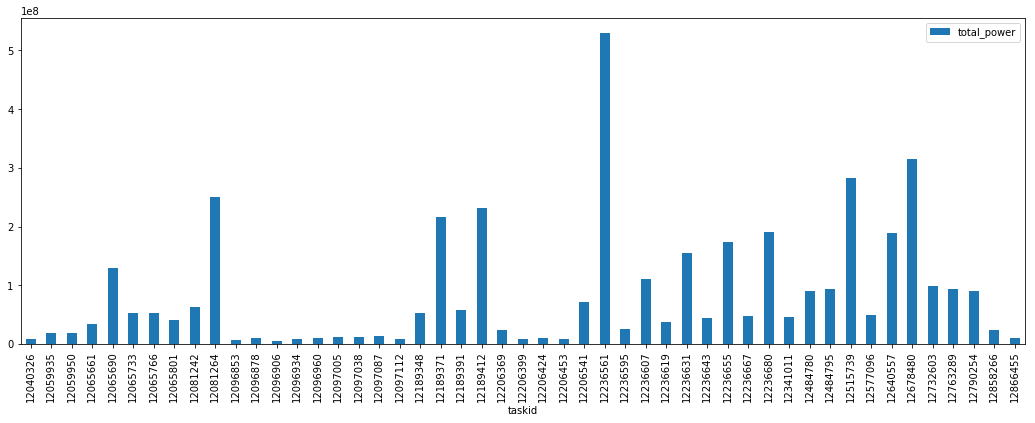

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("task.csv").set_index("taskid")
df=df.sort_index()
#print(df.columns)
del df['Unnamed: 0']
del df["days"]
#df1=df[['core power']]
df["total_power"]=df["core power"]*df["jobs"]*df["avg_cpuperevent"]
print(df.head(2))
df[["core power"]].plot(kind="bar",figsize=(18,6))
df[["avg_cpuperevent"]].plot(kind="bar",figsize=(18,6))
df[["jobs"]].plot(kind="bar",figsize=(18,6))
ax=df[["total_power"]].plot(kind="bar",figsize=(18,6))
ax.get_figure().savefig("taskpower.png")